# Authors: 
         Rutvik Pansare       
         Praksha maheshwari
         Vishal Phaugat

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="password",
  database="NYPDCrimeDB"
)

query = "SELECT * FROM crime_data;"
result = pd.read_sql(query,mydb)


mydb.close() #close the connection

In [ ]:
# convert date string to datetime format
from datetime import datetime
year_query = result.copy()
dates =[]
year_query['CMPLNT_FR_DT'] = pd.to_datetime(year_query['CMPLNT_FR_DT'])
year_query['YEAR'] = pd. DatetimeIndex(year_query['CMPLNT_FR_DT']).year

In [ ]:
year_query.drop(['CMPLNT_NUM', 'JURIS_DESC','X_COORD_CD','Y_COORD_CD','Lat_Lon'], axis=1, inplace=True)
year_query['CMPLNT_FR_TM'] = year_query['CMPLNT_FR_TM'].dt.components['hours']
year_query['CMPLNT_FR_DT'] = pd.DatetimeIndex(year_query['CMPLNT_FR_DT']).month
year_query

,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR
0,2,18,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BROOKLYN,RESIDENCE - APT. HOUSE,18-24,BLACK HISPANIC,M,40.576237762,-73.959504022,45-64,WHITE,F,2012
1,1,0,DANGEROUS WEAPONS,COMPLETED,MISDEMEANOR,BRONX,BAR/NIGHT CLUB,45-64,BLACK HISPANIC,M,40.858249408,-73.902348526,UNKNOWN,UNKNOWN,E,2016
2,1,17,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BRONX,STREET,18-24,WHITE,M,40.804012949000004,-73.878331833,18-24,WHITE HISPANIC,M,2010
3,11,20,DANGEROUS DRUGS,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,45-64,BLACK,M,40.675310519,-73.96661445,UNKNOWN,UNKNOWN,E,2017
4,7,14,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,DRY CLEANER/LAUNDRY,25-44,BLACK,F,40.654621066,-73.952893562,25-44,ASIAN / PACIFIC ISLANDER,M,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725046,9,13,DANGEROUS DRUGS,COMPLETED,MISDEMEANOR,BRONX,STREET,25-44,BLACK,M,40.814847198,-73.89908132,UNKNOWN,UNKNOWN,E,2016
1725047,6,18,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,STORE UNCLASSIFIED,45-64,BLACK,F,40.639305956,-73.948339154,UNKNOWN,UNKNOWN,D,2015
1725048,4,9,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,QUEENS,RESIDENCE-HOUSE,25-44,BLACK,M,40.676568265,-73.79194598699999,25-44,WHITE HISPANIC,F,2012
1725049,9,13,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,CHAIN STORE,45-64,WHITE,F,40.609583959,-73.95843934199999,UNKNOWN,UNKNOWN,D,2015


In [ ]:
clean2 = year_query.drop(['OFNS_DESC','YEAR','PREM_TYP_DESC','SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX'], axis=1)

In [ ]:
val = ['25-44','45-64','<18','18-24','65+']
clean = clean2.copy()

clean = clean[clean['VIC_AGE_GROUP'].isin(val)]

newdf = clean[clean['VIC_AGE_GROUP'].isin(['25-44','45-64','<18','18-24','65+'])]

In [ ]:
for i in clean['VIC_AGE_GROUP']:
    if i in val:
        pass
    else:
        clean = clean.drop(i)

In [ ]:
clean

,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,2,18,COMPLETED,MISDEMEANOR,BROOKLYN,40.576237762,-73.959504022,45-64,WHITE,F
2,1,17,COMPLETED,MISDEMEANOR,BRONX,40.804012949000004,-73.878331833,18-24,WHITE HISPANIC,M
4,7,14,COMPLETED,MISDEMEANOR,BROOKLYN,40.654621066,-73.952893562,25-44,ASIAN / PACIFIC ISLANDER,M
5,11,7,COMPLETED,VIOLATION,BROOKLYN,40.668434087000044,-73.87423541899994,45-64,BLACK,F
6,5,19,COMPLETED,MISDEMEANOR,MANHATTAN,40.74041591300004,-73.97597511999999,<18,BLACK,F
...,...,...,...,...,...,...,...,...,...,...
1725039,8,14,COMPLETED,FELONY,BRONX,40.81070266500007,-73.91621424499994,25-44,BLACK,M
1725042,1,1,COMPLETED,FELONY,BRONX,40.863507281,-73.904463,18-24,BLACK,F
1725045,8,5,COMPLETED,MISDEMEANOR,BRONX,40.822569916,-73.911307169,<18,WHITE HISPANIC,F
1725048,4,9,COMPLETED,MISDEMEANOR,QUEENS,40.676568265,-73.79194598699999,25-44,WHITE HISPANIC,F


In [ ]:
le = LabelEncoder()

In [ ]:
# label encoding the target column - i have kept suspect age as target.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = clean

dfle.BORO_NM = le.fit_transform(dfle.BORO_NM)
dfle.CRM_ATPT_CPTD_CD = le.fit_transform(dfle.CRM_ATPT_CPTD_CD)
dfle.LAW_CAT_CD = le.fit_transform(dfle.LAW_CAT_CD)
dfle.VIC_AGE_GROUP = le.fit_transform(dfle.VIC_AGE_GROUP)
dfle.VIC_SEX = le.fit_transform(dfle.VIC_SEX)
dfle.VIC_RACE = le.fit_transform(dfle.VIC_RACE)
dfle

,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,2,18,1,1,1,40.576237762,-73.959504022,2,6,2
2,1,17,1,1,0,40.804012949000004,-73.878331833,0,7,3
4,7,14,1,1,1,40.654621066,-73.952893562,1,1,3
5,11,7,1,2,1,40.668434087000044,-73.87423541899994,2,2,2
6,5,19,1,1,2,40.74041591300004,-73.97597511999999,4,2,2
...,...,...,...,...,...,...,...,...,...,...
1725039,8,14,1,0,0,40.81070266500007,-73.91621424499994,1,2,3
1725042,1,1,1,0,0,40.863507281,-73.904463,0,2,2
1725045,8,5,1,1,0,40.822569916,-73.911307169,4,7,2
1725048,4,9,1,1,3,40.676568265,-73.79194598699999,1,7,2


In [ ]:
dfle.to_csv(r"C:\Users\praks\PycharmProjects\CSCI620\BigData Project\NYC_encodedData.csv", index = False)

In [ ]:
encoded = dfle

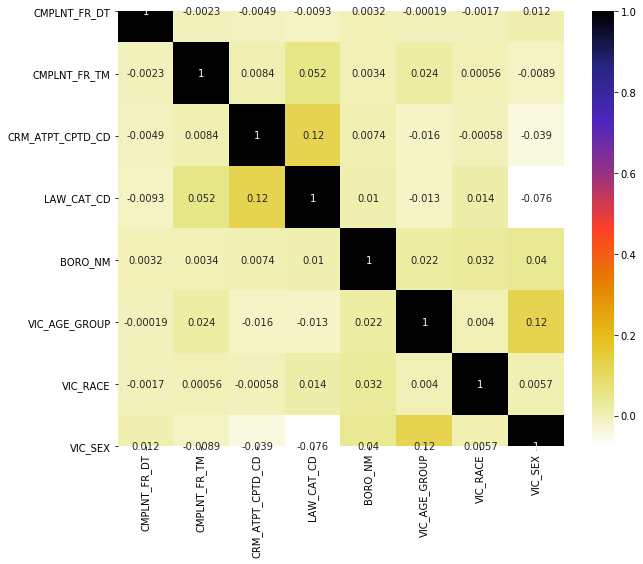

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(10,8))
cor = encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()
result.corr()
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
x = encoded.drop(['BORO_NM'],axis=1)
y = encoded['BORO_NM']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
#Random Forest Regression
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9653785474777067

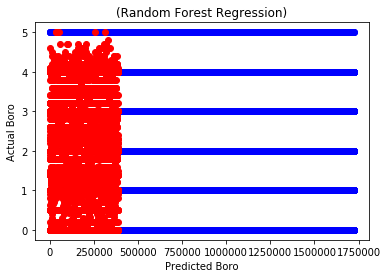

In [ ]:
# x_grid = np.arange(dataset.iloc[:,2:3].values)
# x_grid = x_grid.reshape((len(x_grid), 1))
# plt.scatter(y_test,y_pred)
# plt.scatter(, color = 'blue')
plt.plot(y_test,'o',color="blue")
plt.plot(y_pred,'o',color="red")
plt.title('(Random Forest Regression)')
plt.xlabel('Predicted Boro')
plt.ylabel('Actual Boro')
plt.show()

In [ ]:
x = encoded['LAW_CAT_CD']
y = encoded['CMPLNT_FR_TM']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [ ]:
y_pred = regressor.predict(np.array(x_test).reshape(-1,1))

In [ ]:
#Random Forest Regression
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.0028774005550137316

In [ ]:
X = encoded['LAW_CAT_CD']
y = encoded['CMPLNT_FR_TM']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Linear Regression
from sklearn.metrics import r2_score
r2_score(y_test, lin_reg.predict(np.array(X_test).reshape(-1,1)))

0.0027157285619870963

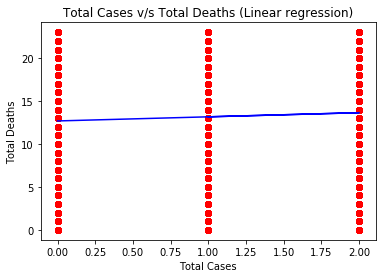

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(np.array(X).reshape(-1,1)), color = 'blue')
plt.title('Total Cases v/s Total Deaths (Linear regression)')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(np.array(X_train).reshape(-1,1))
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Polynomial Regression
from sklearn.metrics import r2_score
from sklearn import linear_model

r2_score(y_test, lin_reg_2.predict(poly_reg.fit_transform(np.array(X_test).reshpae(-1,1))))

NameError: name 'y_test' is not defined